   Train                Test    Model  Performance Ratio
25    ER    Skew(unweighted)  ECO-DQN           0.907895
26    ER      Skew(weighted)  ECO-DQN           0.945481
27    ER      ER(unweighted)  ECO-DQN           0.989462
28    ER        ER(weighted)  ECO-DQN           0.946943
29    ER  Torodial(weighted)  ECO-DQN           0.981337
30    ER    Skew(unweighted)    LSDQN           0.925305
31    ER      Skew(weighted)    LSDQN           0.732807
32    ER      ER(unweighted)    LSDQN           0.970949
33    ER        ER(weighted)    LSDQN           0.855217
34    ER  Torodial(weighted)    LSDQN           0.625487
35    ER    Skew(unweighted)    TS+LR           0.974397
36    ER      Skew(weighted)    TS+LR           0.951806
37    ER      ER(unweighted)    TS+LR           0.985520
38    ER        ER(weighted)    TS+LR           0.977315
39    ER  Torodial(weighted)    TS+LR           0.985630
40    ER    Skew(unweighted)      S2V           0.687389
41    ER      Skew(weighted)   

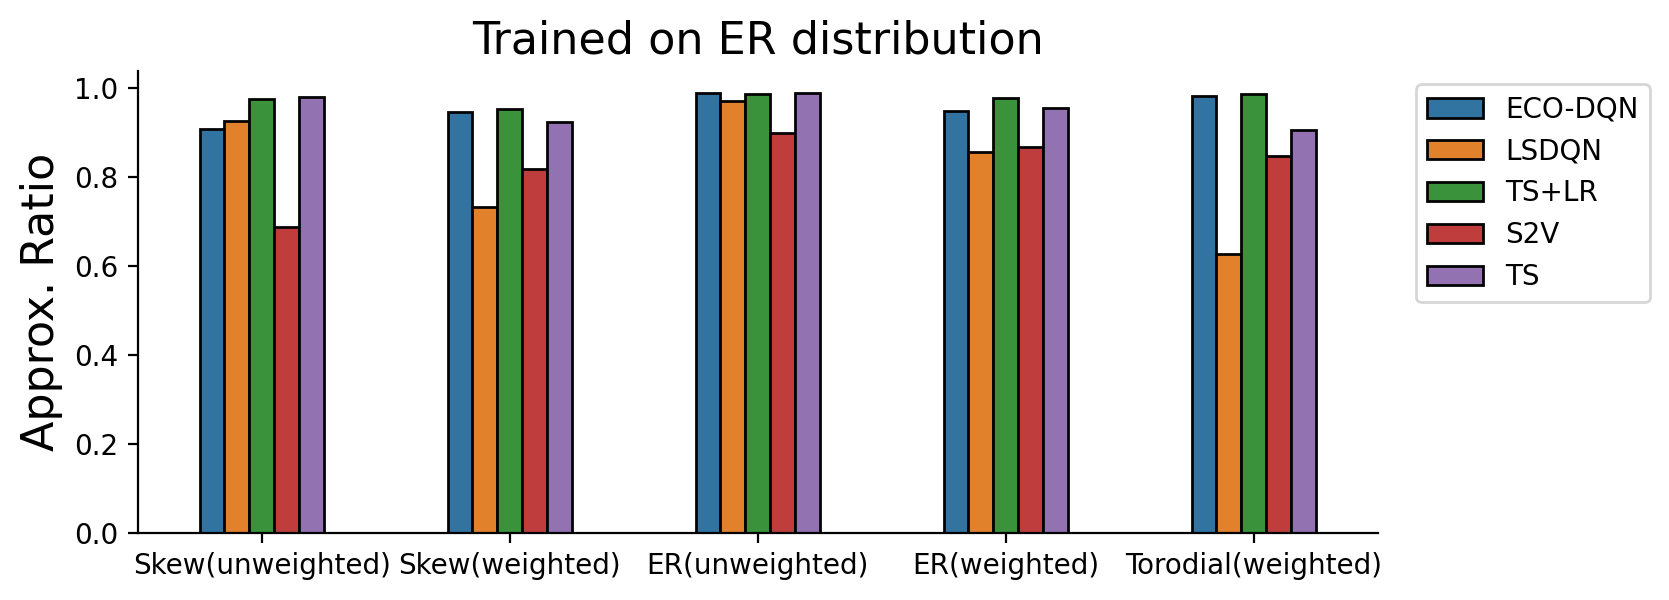

In [1]:
import pickle
import os
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data



plt.rcParams.update({'font.size': 10})

# print(os.listdir('generalization'))
root_folder='generalization'

folders=os.listdir(root_folder)
folders.sort()


df={'Train':[],'Test':[],'Model':[],'Performance Ratio':[]}


for folder in folders:

    if folder.startswith('rnd'):
        train_dist='ER'
    elif folder.startswith('planar'):
        train_dist='Skew'
    else:
        train_dist='torodial'

    
    if folder.endswith('S2V'):
        model='S2V'
    elif folder.endswith('LSDQN'):
    
        model='LSDQN'
    elif folder.endswith('LinearRegression'):
        model='TS+LR'
    elif folder.endswith('TS'):
        model='TS'
    elif folder.endswith('ECO_DQN'):
        model='ECO-DQN'
    # model=folder.split('_',maxsplit=4)[-1]
    # print('Model:',model)
    folder_path=os.path.join(root_folder,folder)
    files=os.listdir(folder_path)
    files.sort()
    for file in files:
        test_distribution=file.split('_',maxsplit=1)[1]
        data=load_pickle(file_path=os.path.join(folder_path,file))
        OPT = load_pickle(f'../data/testing/{test_distribution}/optimal')['OPT']
        ratio=(data['cut']/OPT).mean()
        df['Train'].append(train_dist)
        # df['Test'].append(test_distribution.split('_')[0])
        if test_distribution.startswith('planar'):
            distribution_type = 'Skew'
        elif test_distribution.startswith('rnd'):
            distribution_type = 'ER'
        elif test_distribution.startswith('toro'):
            distribution_type = 'Torodial'

        if distribution_type:
            test_distribution = f'{distribution_type}({test_distribution.split("_")[-1]})'



        df['Test'].append(test_distribution)
        df['Model'].append(model)
        df['Performance Ratio'].append(ratio)
        # df['OPT'] += OPT.to_list()

    
    # print()
    # print(folder)
    # break

import seaborn as sns
import matplotlib.pyplot as plt

df=pd.DataFrame(df)

i=0
for train_dist,train_group_df in df.groupby('Train'):
    print(train_group_df)
    # for test_dist,test_group_df in train_group_df.groupby('Test'):

    plt.figure(dpi=200,figsize=(8, 3))
#     plt.figure(dpi=200)
    ax = sns.barplot(data=train_group_df, x="Test", y="Performance Ratio", hue="Model", width=0.5, 
                     errwidth='1', linewidth=1, edgecolor=".01",
                     )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    sns.despine(ax=ax, top=True, right=True)
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0))
    # if i==2:
    #     ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0))
    # else:
    #     ax.get_legend().remove()
    # plt.ylim(0.9, 1)
    plt.title(f'Trained on {train_dist} distribution',fontsize=16)
    plt.ylabel('Approx. Ratio',fontsize=16)
    plt.xlabel('')
    plt.savefig(f'{train_dist}.pdf',format='pdf', dpi=300,bbox_inches='tight')
    i+=1
    break
    # plt.xlabel('Distributions')

    # print(train_group_df)
        # print('')
        # sns.barplot(x='Model', y='Performance Ratio', data=test_group_df)
        # break
    